# NB: NumPy Continued



## Quick Refresher on Shape

The **shape** of an array is represented a **tuple**, e.g. `(n, m)` for a 2D array.

* The **length** of the tuple is number of **dimensions** (i.e. axes).
* The **values** of the tuple are the number of **elements** in each dimension (axis).

Consider the array `foo`:

In [1]:
import numpy as np

In [2]:
foo = np.ones((6,4))

In [3]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

It was created with the $2$ dimensions.
* The first dimension, axis 0, has $6$ elements. In this case, these elements are arrays.
* The second dimension, axis 1, has $4$ elements. Its elements are scalars (numbers in this case).

The shape of `foo[0]` is $4$. It contains $1$ axis with $4$ elements.

In [4]:
foo[0], foo[0].shape

(array([1., 1., 1., 1.]), (4,))

It has a shape of $1$ and not $4 \times 1$ because it is a vector, not a matrix.

**SO, there is a difference between a vector and a 1-column matrix.**

### Reshaping

If we want to make it into a 1-column matrix, we need to reshape it using `np.reshape()`.

Note that the first value of the shape argument is $-1$. This means use the length of the vector that is passed to it. 

In [5]:
## np.reshape?

In [6]:
foo2 = np.reshape(foo[0], (-1, 1))

In [7]:
foo2, foo2.shape

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 (4, 1))

When indexing an array, think of the **positions** of the comma-delimitted tuple as the axis.  

The **values** are the **element offsets** in the containing array. The

In [8]:
foo[2:, 2:]
##   ^   ^ 
##   0   1  <- AXIS NUMBER

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

### Use Case

Sometimes, you need to convert vectors into 1-column matrices to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$. 

In [113]:
x = np.random.randn(100)
y = np.random.randn(100)

We can fit a regression line using the **normal equation**, which appears in this week's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standward way of expressing it in NumPy:

In [114]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two variables, `x` and `y`.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [115]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [116]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [117]:
get_beta2(x, y)

-0.024001726229633015

We can fix the problem in the general case by converting our vector into a matrix using `np.reshape()`.

In [118]:
x_as_matrix = np.reshape(x, (-1, 1))

In [119]:
get_beta1(x_as_matrix, y)

array([[-0.02400173]])

In [120]:
get_beta1(x_as_matrix, y)[0][0]

-0.024001726229633015

In [121]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

True

## Array-Oriented Programming

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions **without writing loops**. 

This practice of **replacing explicit loops with array expressions** is referred to by some people as **vectorization**. 

Vectorized array operations are often significantly **faster** than their pure Python equivalents.

They are also **visually concise and elegant**, although loops have the virtue of visualizing what's under the hood in an algorithm.

## Expressing Conditional Logic as Array Operations

### `np.where()`

The `np.where` function is a vectorized version of the ternary expression `x if condition else y`. 

Suppose we had a boolean array and two arrays of values:

In [124]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [125]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [126]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Here is the vectorized version:

In [127]:
result = np.where(cond, xarr, yarr)

In [128]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [130]:
arr = np.random.randn(4, 4)

In [131]:
arr

array([[ 0.71377598,  1.04448549,  0.45741241,  0.5140798 ],
       [-0.82391345, -1.0197481 ,  1.4060606 ,  0.62358815],
       [ 0.02333953,  0.88690155, -0.22585342,  0.56837897],
       [-0.26536153,  0.40478114, -1.47759854,  2.19904386]])

In [132]:
arr > 0

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True],
       [False,  True, False,  True]])

In [133]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [-2, -2,  2,  2],
       [ 2,  2, -2,  2],
       [-2,  2, -2,  2]])

In [134]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.82391345, -1.0197481 ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.22585342,  2.        ],
       [-0.26536153,  2.        , -1.47759854,  2.        ]])

## Mathematical and Statistical Methods

Statistical computations are aggregate functions apply to vectors within an array.

In a 2D array, they can be applied to rows or columns, i.e. **axis $0$ or axis $1$**.

Let's create an array of random values. We can think of it is a table of observations and random variables.

In [135]:
arr = np.random.randn(5, 4)

In [136]:
arr

array([[-0.91177405,  0.38092718,  1.24694083, -0.99704974],
       [-0.56115404, -0.93705255, -1.21305553, -0.64927237],
       [-1.19457832,  1.83434483,  2.27671145,  0.26169299],
       [-0.84889108, -0.83572139, -0.57758317,  1.58662962],
       [ 0.19319093,  1.82049028,  0.27858004, -1.73954701]])

### `.mean()`

In [137]:
arr.mean()

-0.029308553860170082

In [138]:
np.mean(arr)

-0.029308553860170082

In [140]:
arr.mean(axis=1)

array([-0.07023894, -0.84013362,  0.79454274, -0.1688915 ,  0.13817856])

In [141]:
arr.mean(axis=0)

array([-0.66464131,  0.45259767,  0.40231872, -0.3075093 ])

### `.sum()`

In [142]:
arr.sum()

-0.5861710772034017

Row wise aggregration

In [144]:
arr.sum(axis=0)

array([-3.32320656,  2.26298836,  2.01159362, -1.5375465 ])

In [145]:
arr.mean(axis=1)

array([-0.07023894, -0.84013362,  0.79454274, -0.1688915 ,  0.13817856])

Column-wise aggregration

### `.cumsum()`

In [147]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [148]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [149]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [150]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [151]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [152]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## Methods for Boolean Arrays

### `.sum()`

Since booleans are $0$s and $1$, we can sum them to get a total truth count.

In [153]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

52

In [154]:
bools = np.array([False, False, True, False])

### `.any()`

In [155]:
bools.any()

True

### `.all()`

In [156]:
bools.all()

False

## Sorting 

### `.sort()`

In [157]:
arr = np.random.randn(6)

In [158]:
arr

array([ 0.02890946, -0.72562683, -0.64281354,  0.64857369, -0.4963519 ,
        1.87264121])

In [159]:
arr.sort()

In [160]:
arr

array([-0.72562683, -0.64281354, -0.4963519 ,  0.02890946,  0.64857369,
        1.87264121])

In [161]:
arr = np.random.randn(5, 3)

In [162]:
arr

array([[-1.23306247, -1.07817007, -0.88382084],
       [-0.6643465 ,  1.25664102, -1.30704653],
       [ 0.4346452 ,  1.83475168,  0.05308342],
       [-0.45280164,  1.55820042,  0.45709586],
       [-1.11638437,  0.49329283,  0.19578709]])

In [55]:
arr.sort(1)

In [56]:
arr

array([[-0.53948413, -0.29471714,  0.24943325],
       [-1.89394191, -0.14603575,  0.52316275],
       [-1.37442146, -0.3170239 ,  0.72752286],
       [-1.36313182, -0.11840338,  0.49537141],
       [-0.91273224, -0.10046984,  0.65676513]])

In [57]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.567894136313308

In [58]:
0.05 * len(large_arr)

50.0

## Unique and Other Set Logic

### `np.unique()`

In [59]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [60]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [61]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

### `np.in1d()`

Tests whether each element of a 1-D array is also present in a second array.

In [62]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

### `np.save()`

Save an array to a binary file in NumPy ``.npy`` format.

Automatically adds the `.npy` file extension.

In [63]:
arr = np.arange(10)
np.save('some_array', arr)

### `np.load()`

In [64]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.savetxt()`

Save an array to a text file.

In [65]:
## np.savetxt?

In [66]:
np.savetxt('some_array.txt', arr)

In [67]:
## !more some_array.txt

### `np.savez()`

Save several arrays into a single file in uncompressed ``.npz`` format.

In [68]:
np.savez('array_archive.npz', a=arr, b=arr)

In [69]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

Clean up ...

In [71]:
!rm some_array.npy
!rm some_array.txt
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

### `.dot()`

Dot product of two arrays. Specifically,
- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).
- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using `matmul()` or `a @ b` is preferred.
- If either `a` or `b` is 0-D (scalar), it is equivalent to `multiply()`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.
- If `a` is an N-D array and `b` is an M-D array (where `M>=2`), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`:
  
```
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```

In [72]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [73]:
x, y

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 6., 23.],
        [-1.,  7.],
        [ 8.,  9.]]))

In [74]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [75]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [76]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [77]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In NumPy, the `@` operator means [matrix multiplication](https://www.codingem.com/numpy-at-operator/).

In [78]:
x @ np.ones(3)

array([ 6., 15.])

### `np.linalg.inv()`

In [79]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[  82.23753613, -189.34702802,   57.89427716,  -86.97294656,
          68.51814145],
       [-189.34702802,  441.92546046, -133.60834562,  202.37323804,
        -160.52735198],
       [  57.89427716, -133.60834562,   40.98838836,  -61.30726732,
          48.29124514],
       [ -86.97294656,  202.37323804,  -61.30726732,   93.2165725 ,
         -73.66323218],
       [  68.51814145, -160.52735198,   48.29124514,  -73.66323218,
          58.66394059]])

In [80]:
mat.dot(inv(mat))
q, r = qr(mat)

In [81]:
r

array([[-4.00031019e+00,  1.48047378e-02,  4.60703932e+00,
        -1.62642596e+00, -1.12523384e+00],
       [ 0.00000000e+00, -2.48637846e+00, -4.06882033e+00,
        -2.42319594e+00, -6.51048292e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.90679466e+00,
        -2.73436486e+00, -1.86167868e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.26311289e+00, -1.59449990e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.89916328e-03]])

## Pseudorandom Number Generation

### `np.random.normal()`

In [82]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.0332678 ,  0.89782644, -0.5453413 , -0.36360055],
       [ 1.09036779, -0.52316507,  0.81150253,  0.18801634],
       [-2.09205564,  0.4811635 ,  0.52681007, -1.0989904 ],
       [-0.0138388 , -0.46380505, -0.32371458,  0.5047839 ]])

In [83]:


from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

949 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.9 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
np.random.seed(1234)

In [85]:
rng = np.random.RandomState(1234)

In [86]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [87]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

In [88]:
import matplotlib.pyplot as plt

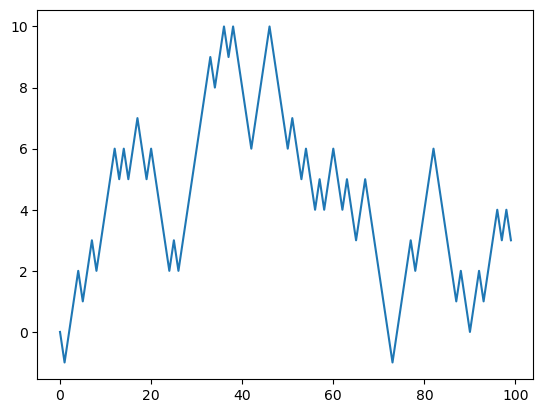

In [89]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [90]:
np.random.seed(12345)

In [91]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

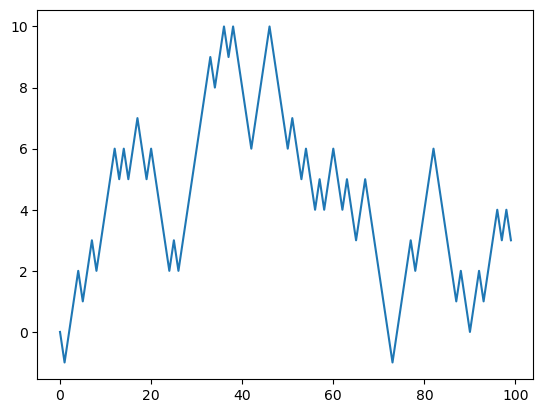

In [92]:
plt.plot(walk[:100]);

In [93]:
walk2.min(), walk2.max()

(-3, 31)

### Simulating Many Random Walks at Once

In [94]:
nwalks = 5000
nsteps = 1000

In [95]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [96]:
draws

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [97]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [98]:
walks.max(), walks.min()

(138, -133)

In [99]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [100]:
hits30.sum() # Number that hit 30 or -30

3410

In [101]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [102]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [103]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

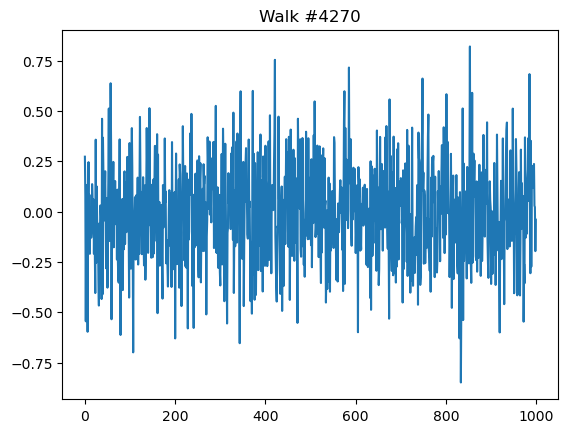

In [104]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");